In [60]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


import importlib
import connectomics_functions   # replace with your filename (without .py)

importlib.reload(connectomics_functions)

from connectomics_functions import plot_adjacency_matrix,metric_set, randomize_graph, rich_club, plot_rich_club, plot_network, plot_weight_distribution


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imports are sucessufl #######################################


# Let us see the how networkX encodes the data

* create and example network
* plot the adjacency matrix
* directed vs. undirected

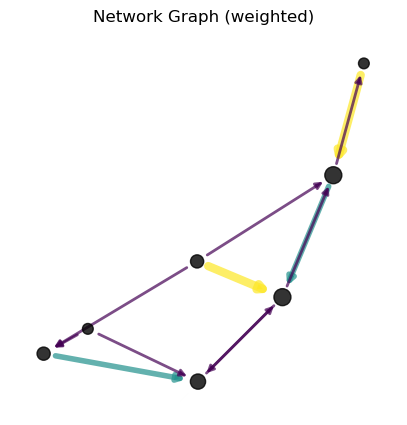

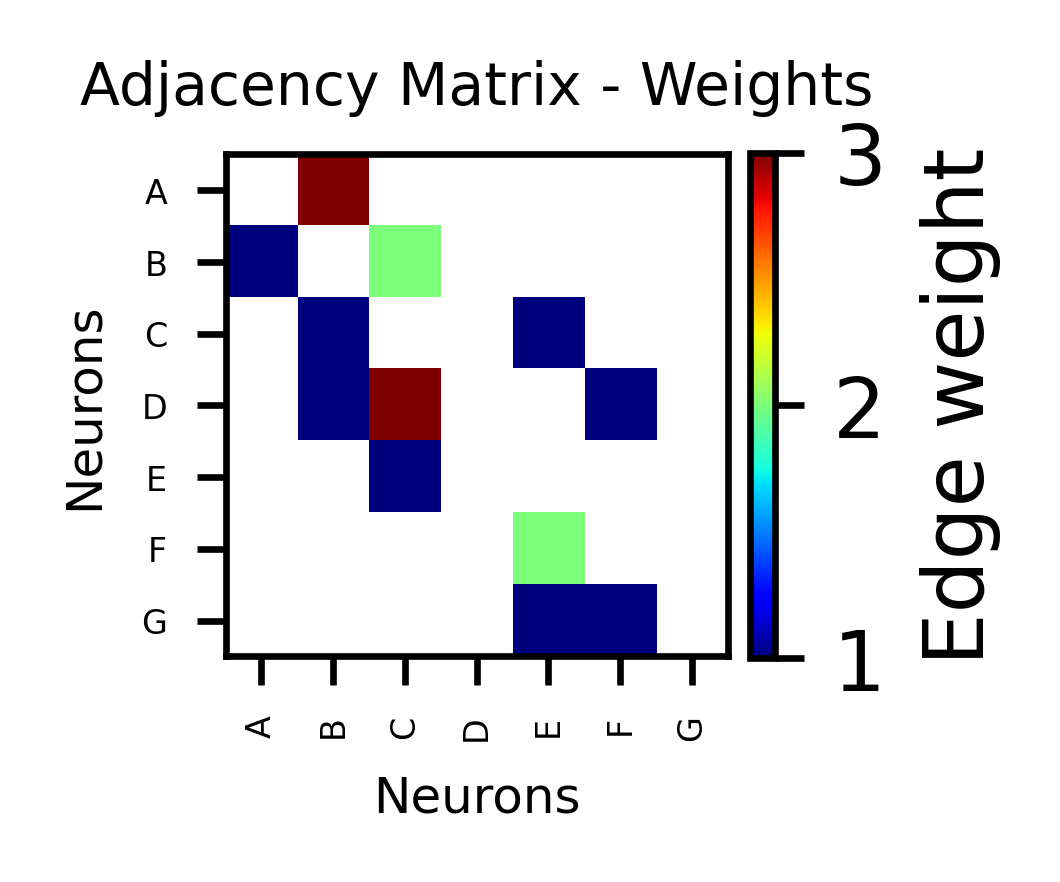

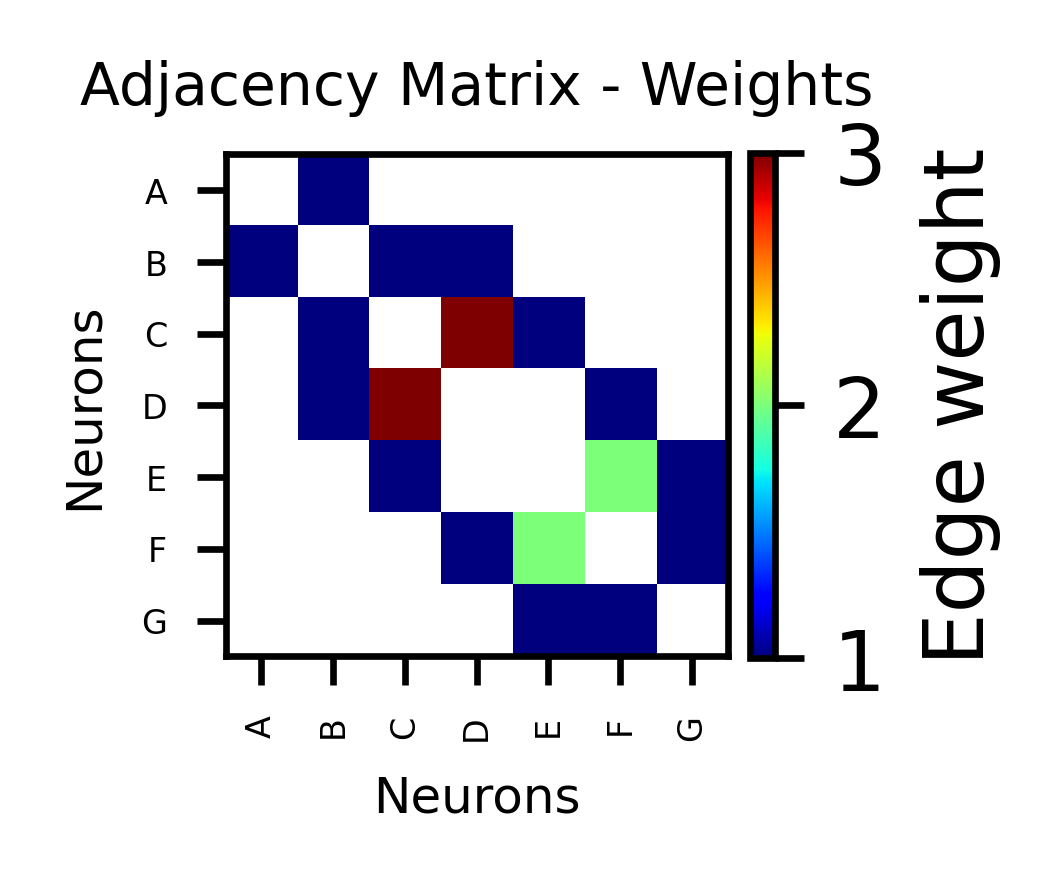

In [66]:
# define a small network
w_list = [{'Neuron 1':'A','Neuron 2':'B','Weight':3},
          {'Neuron 1':'B','Neuron 2':'A','Weight':1},
          {'Neuron 1':'B','Neuron 2':'C','Weight':2},
          {'Neuron 1':'C','Neuron 2':'B','Weight':1},
          {'Neuron 1':'D','Neuron 2':'C','Weight':3},
          {'Neuron 1':'D','Neuron 2':'B','Weight':1},
          {'Neuron 1':'C','Neuron 2':'E','Weight':1},
          {'Neuron 1':'E','Neuron 2':'C','Weight':1},
          {'Neuron 1':'D','Neuron 2':'F','Weight':1},
          {'Neuron 1':'G','Neuron 2':'E','Weight':1},
          {'Neuron 1':'G','Neuron 2':'F','Weight':1},
          {'Neuron 1':'F','Neuron 2':'E','Weight':2}]
w_df = pd.DataFrame(w_list)

G_dir_demo = nx.from_pandas_edgelist(
    w_df,
    source='Neuron 1',
    target='Neuron 2',
    edge_attr='Weight',
    create_using=nx.DiGraph()
)

#instantiating a directed graph
G_dir_demo = nx.from_pandas_edgelist(
    w_df,
    source='Neuron 1',
    target='Neuron 2',
    edge_attr='Weight',
    create_using=nx.DiGraph()
)
#instantiating an undirected graph
G_undir_demo = nx.from_pandas_edgelist(
    w_df,
    source='Neuron 1',
    target='Neuron 2',
    edge_attr='Weight',
    create_using=nx.Graph()
)
plot_network(G_dir_demo, node_size_factor=30, edge_width_factor=2, cmap="viridis", figsize=(5,5))


plot_adjacency_matrix(G_dir_demo,sort_nodes=False)
plot_adjacency_matrix(G_undir_demo,sort_nodes=False)




#### This loads and cleans the data

['ADAR', 'ADAL', 'ADFL', 'ASHL', 'AVDR', 'PVQL', 'ADEL', 'AIAL', 'AIBL', 'AIBR', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVEL', 'AVJR', 'AWAL', 'FLPR', 'PVPL', 'PVR', 'RICL', 'RICR', 'RIML', 'RIPL', 'RMGL', 'SMDVR', 'ADFR', 'ASHR', 'PVQR', 'ADER', 'AIAR', 'AVAL', 'AVJL', 'RIMR', 'RIPR', 'RIVR', 'RMGR', 'SMDVL', 'URBR', 'AINL', 'AVKR', 'ALA', 'AVL', 'BDUL', 'CEPDL', 'FLPL', 'IL1L', 'IL2L', 'OLLL', 'RIAL', 'RIFL', 'RIGL', 'RIGR', 'RIH', 'RIVL', 'RMDL', 'RMHL', 'SIADR', 'SIBDR', 'SMBDR', 'URBL', 'AVKL', 'ALNR', 'AVER', 'AVM', 'BDUR', 'CEPDR', 'IL2R', 'OLLR', 'RMDR', 'SAAVR', 'AIZL', 'AUAL', 'AWBL', 'OLQVL', 'RIR', 'SMBVL', 'AIYR', 'AIZR', 'ASEL', 'AUAR', 'AVHL', 'AWAR', 'AWBR', 'PVPR', 'RIAR', 'SMBVR', 'URXR', 'ADLR', 'ADLL', 'ASER', 'AVHR', 'CEPVL', 'SDQR', 'AWCR', 'PVCL', 'AFDR', 'AFDL', 'AINR', 'AIYL', 'ASIL', 'AIML', 'ASGL', 'ASIR', 'ASKL', 'AWCL', 'HSNL', 'AIMR', 'ASGR', 'ASKR', 'RIFR', 'DVC', 'PVT', 'BAGL', 'HSNR', 'RIBR', 'SAADL', 'SAADR', 'SAAVL', 'SMDDR', 'DB01', 'RIS', 'RIBL', 'SDQL', 

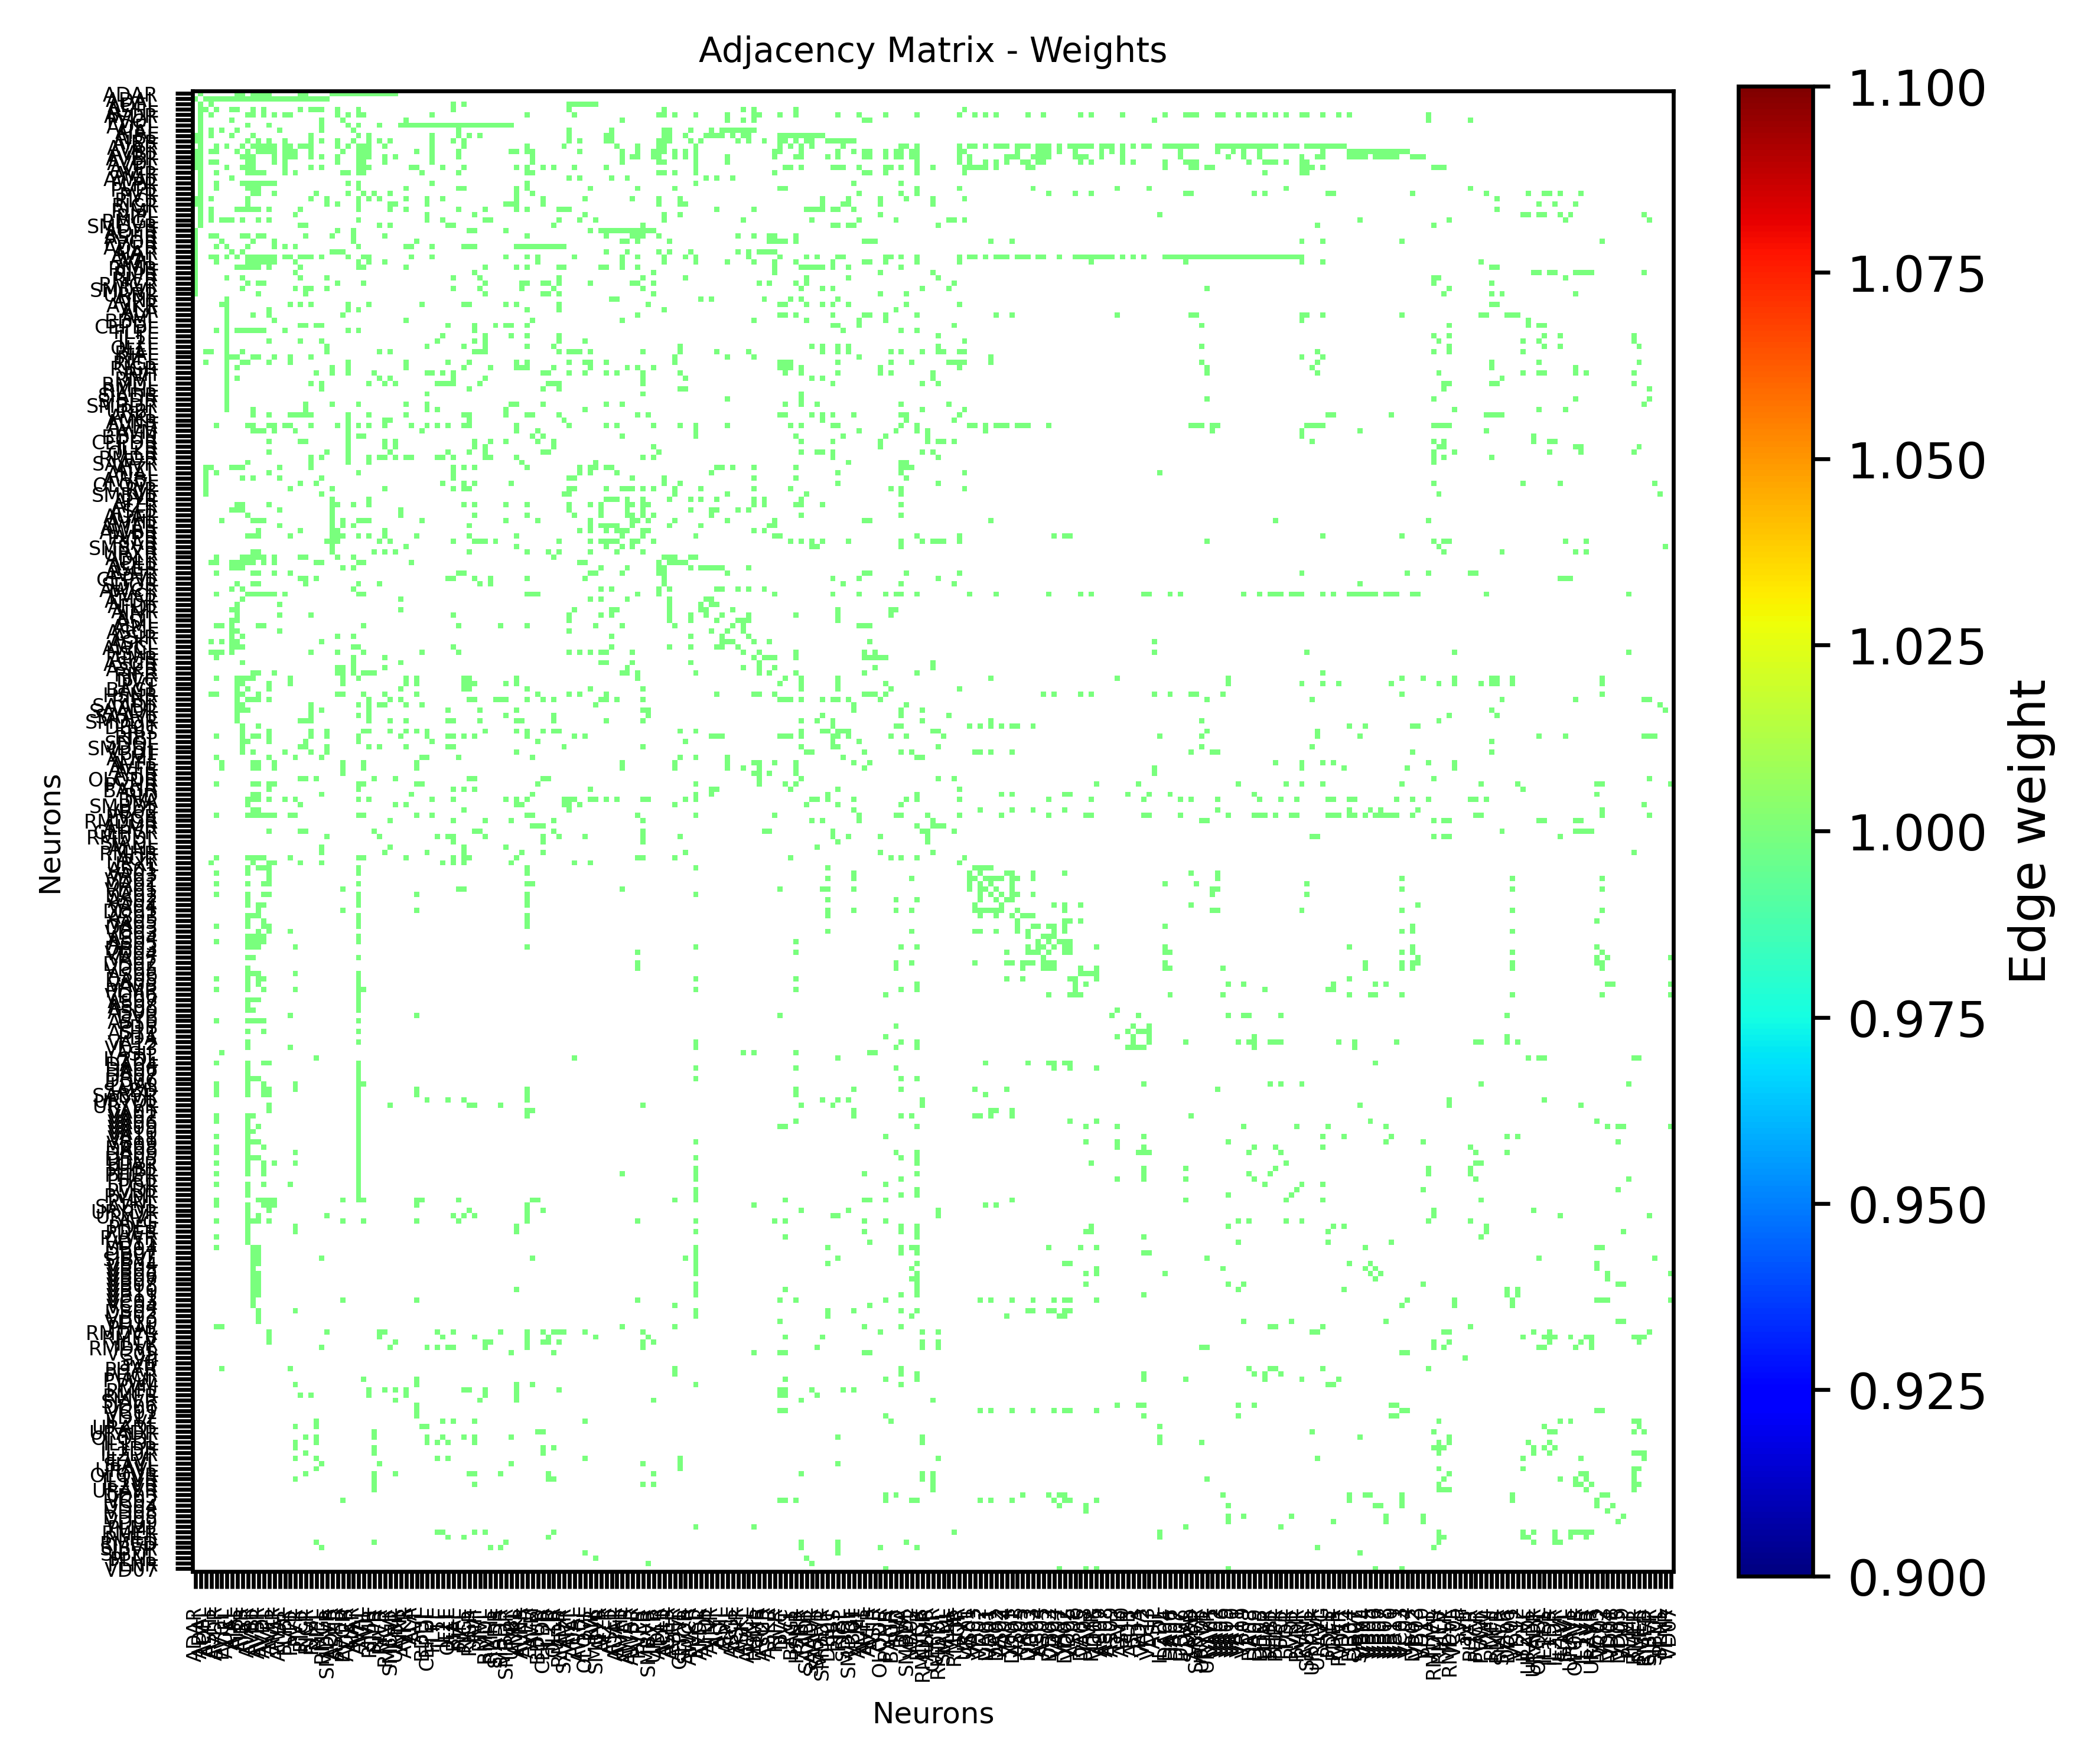

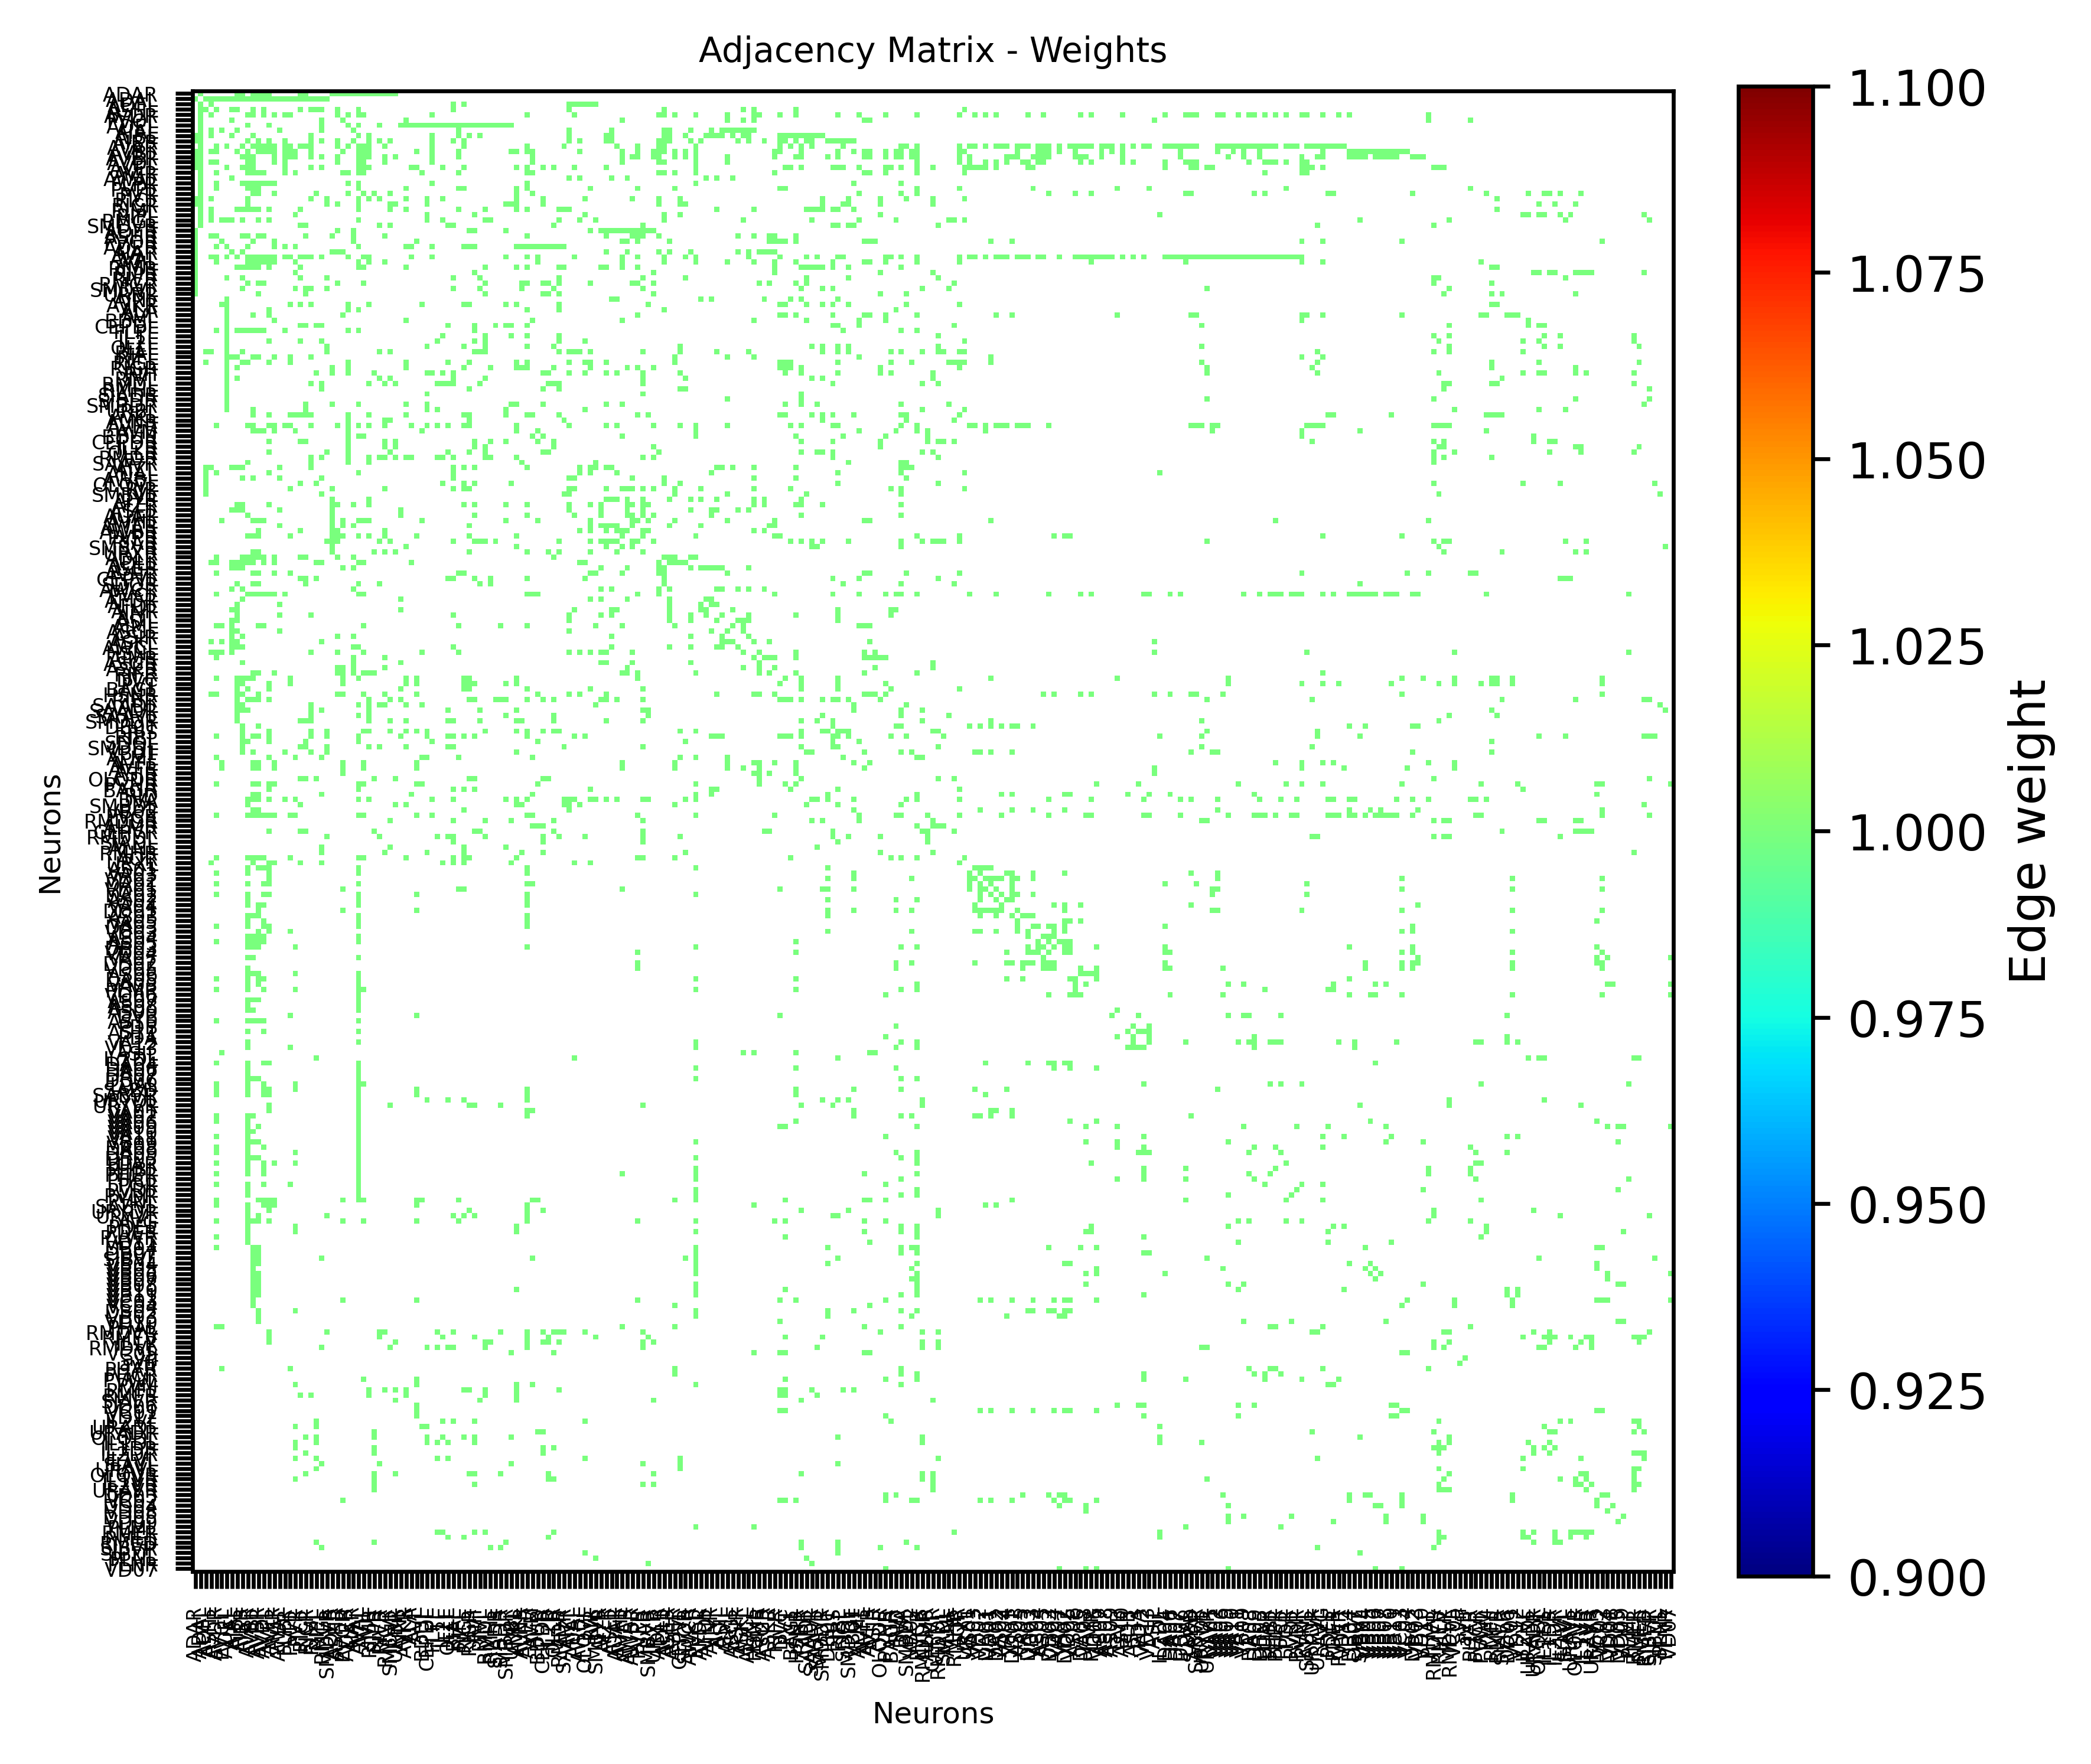

In [63]:
# ======== LOAD DATA ==========================================================
edge_list_path = "NeuronConnect.csv"
raw_data = pd.read_csv(edge_list_path)
raw_data = raw_data.rename(columns={'Nbr': 'weight'})

raw_data = raw_data.drop(np.where(raw_data.Type == "NMJ")[0])

G_dir = nx.from_pandas_edgelist(
    raw_data,
    source='Neuron 1',
    target='Neuron 2',
    edge_attr='weight',
    create_using=nx.DiGraph()
)

# NX stores the nodes and edges in dictionaryies
# for instances the nodes

print(G_dir.nodes)
G_dir._node

#the edges are stored in adjacency dict
print("The adjacency matrix has", str(len(G_dir._adj)), "entries")
print("Individual edges per neurons in this dict look like this")
G_dir._adj['AWCR']



#plotting a adjacency matrix 
plot_adjacency_matrix(G_dir,cmap='jet',sort_nodes=False,figsize=(6,6))

#the undirected graph would look like this: 
G_und = G_dir.to_undirected()
plot_adjacency_matrix(G_und,cmap='jet',sort_nodes=False,figsize=(6,6))

plot_weight_distribution(G_dir, bins=50, fit_powerlaw=True)



### Let us see the adjacency matrix
#### Note that the adjacency matrix is sparse! 

In [24]:
# the data is stored in an adjacency table: 
for nbr, datadict in G_dir.adj['AWCR'].items():
    print(nbr,datadict)

#plotting a adjacency matrix 
plot_adjacency_matrix(G_dir,cmap='binary',sort_nodes=False)


ADLR {'weight': 3}
AIAL {'weight': 1}
AIAR {'weight': 1}
AIBR {'weight': 4}
AIYL {'weight': 3}
AIYR {'weight': 6}
ASEL {'weight': 1}
ASER {'weight': 1}
ASGR {'weight': 1}
ASIL {'weight': 1}
ASIR {'weight': 1}
AWCL {'weight': 4}


## Let us compute the rich club

Rich-club threshold degree: 41
Number of neurons in rich club: 11
Rich-club neurons: ['AVDR', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVEL', 'AVAL', 'AVER', 'PVCL', 'DVA', 'PVCR']


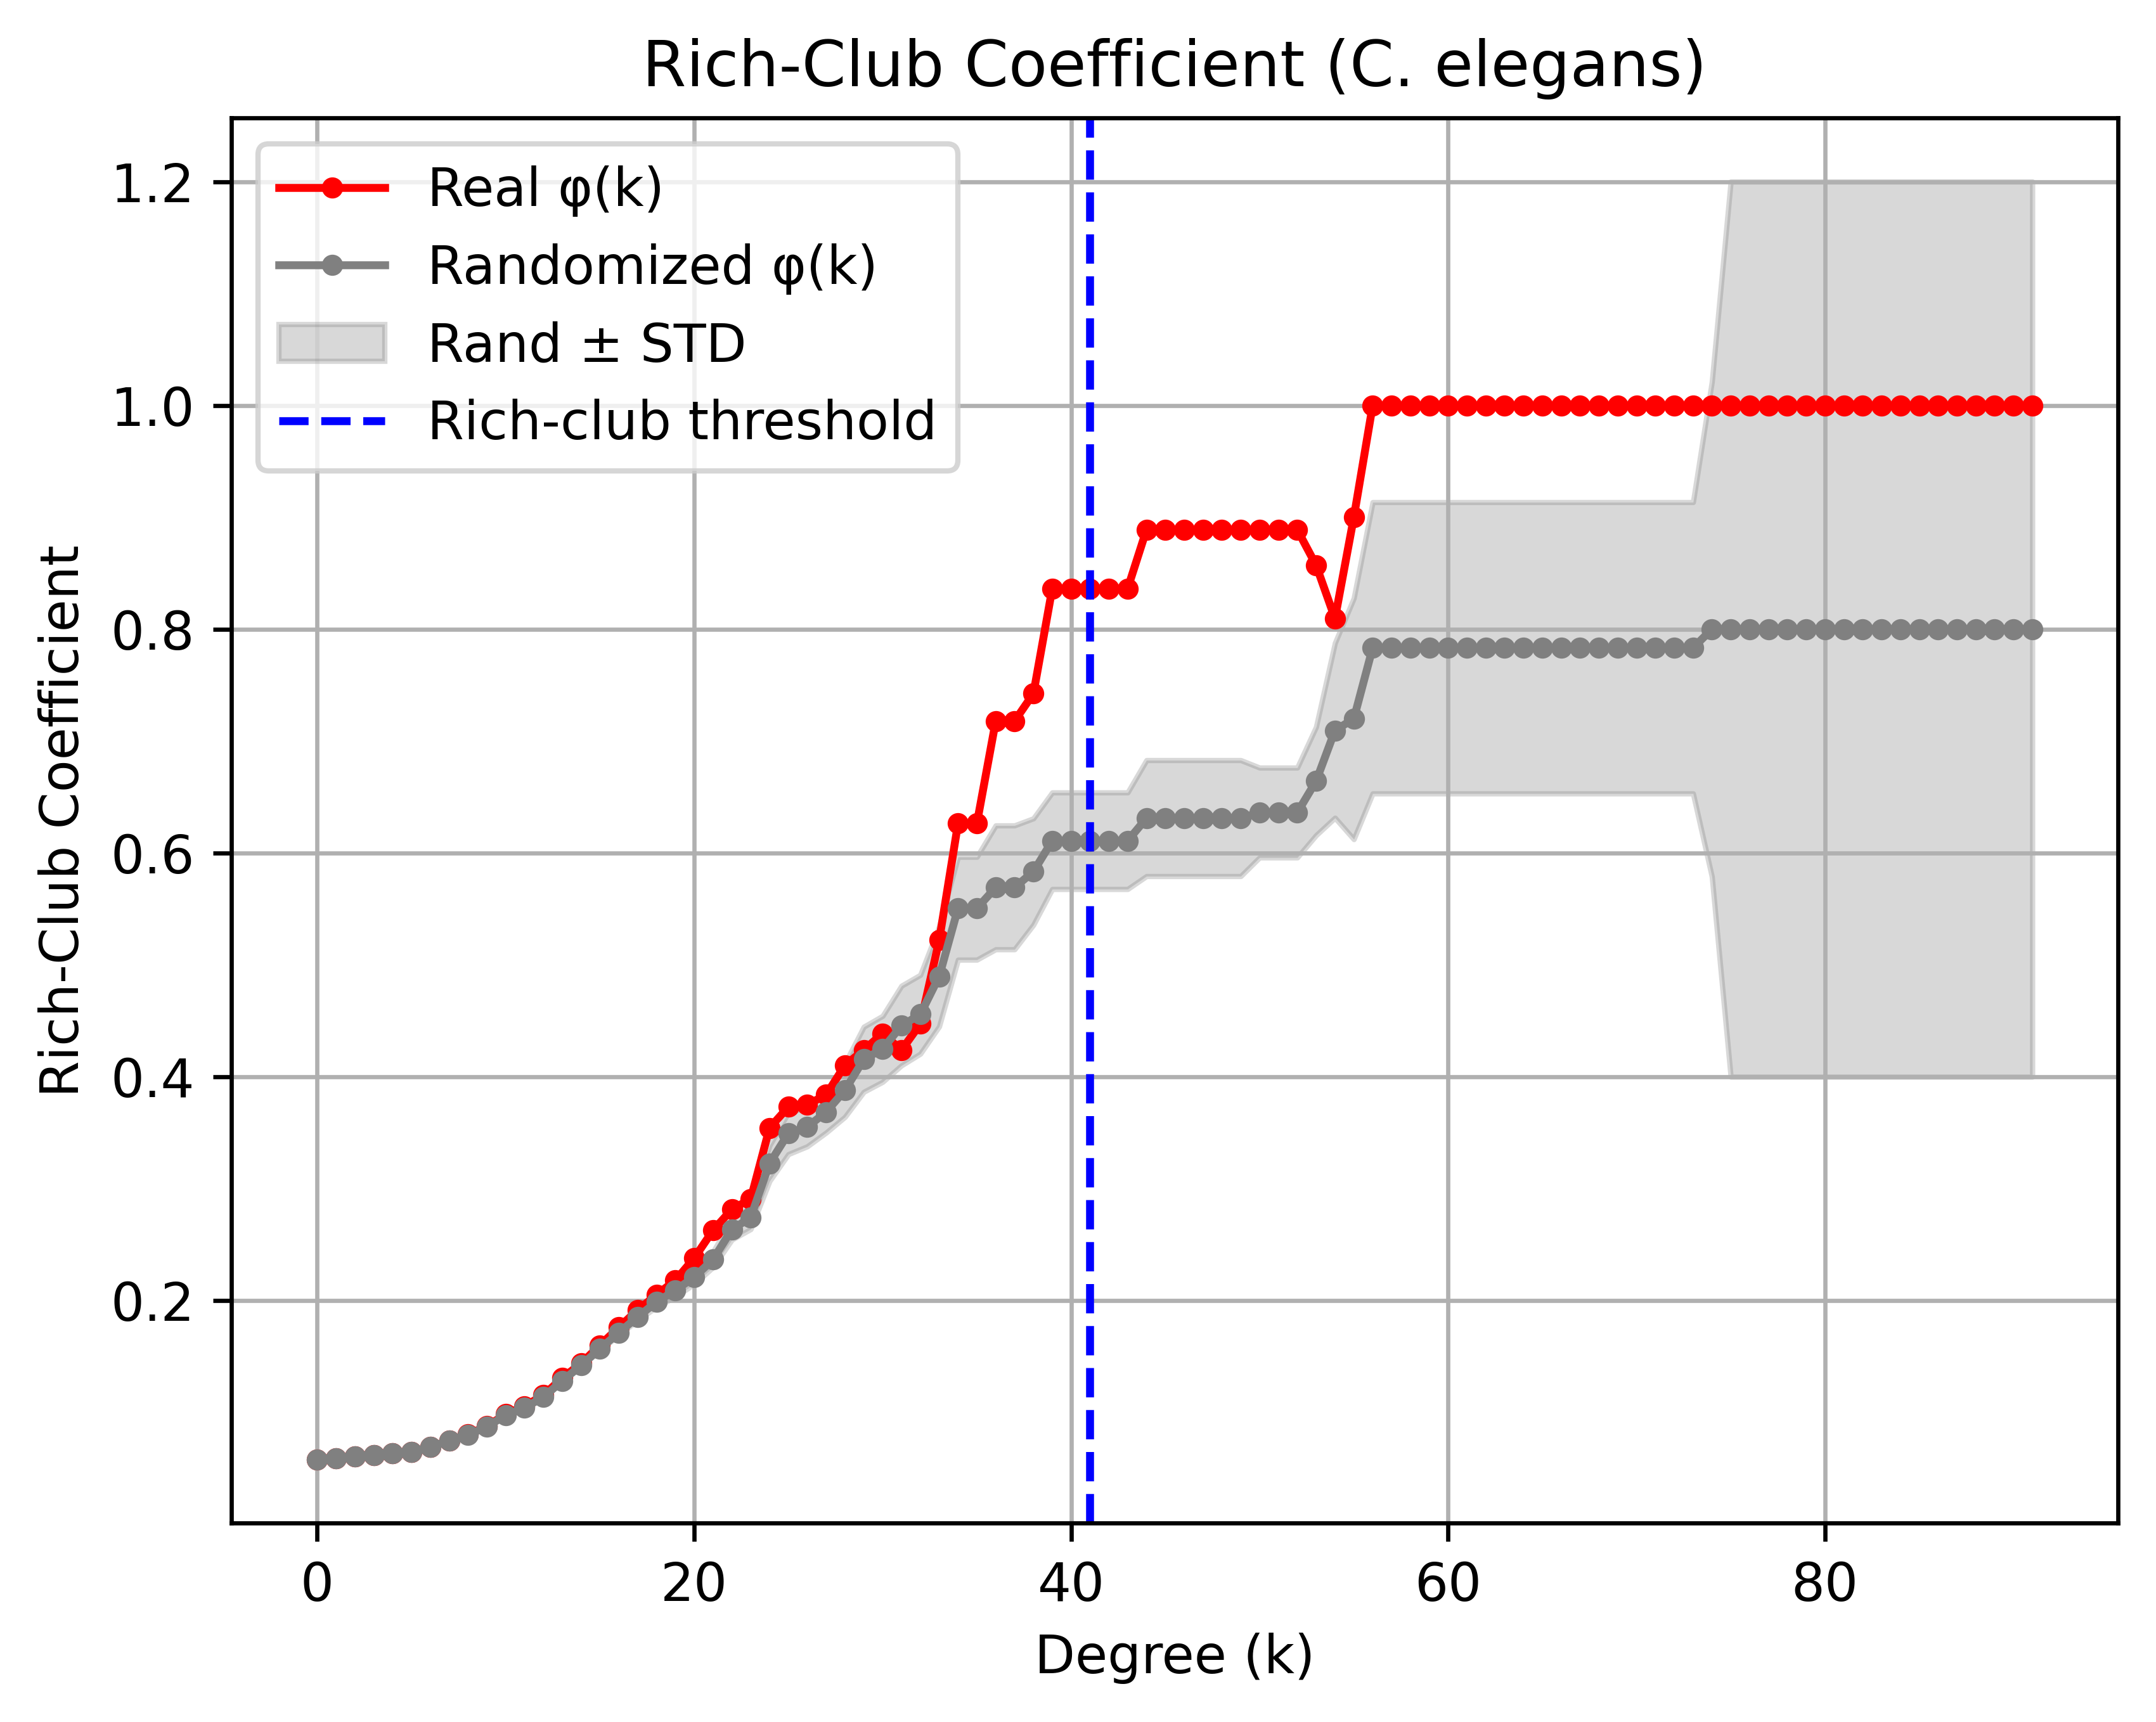

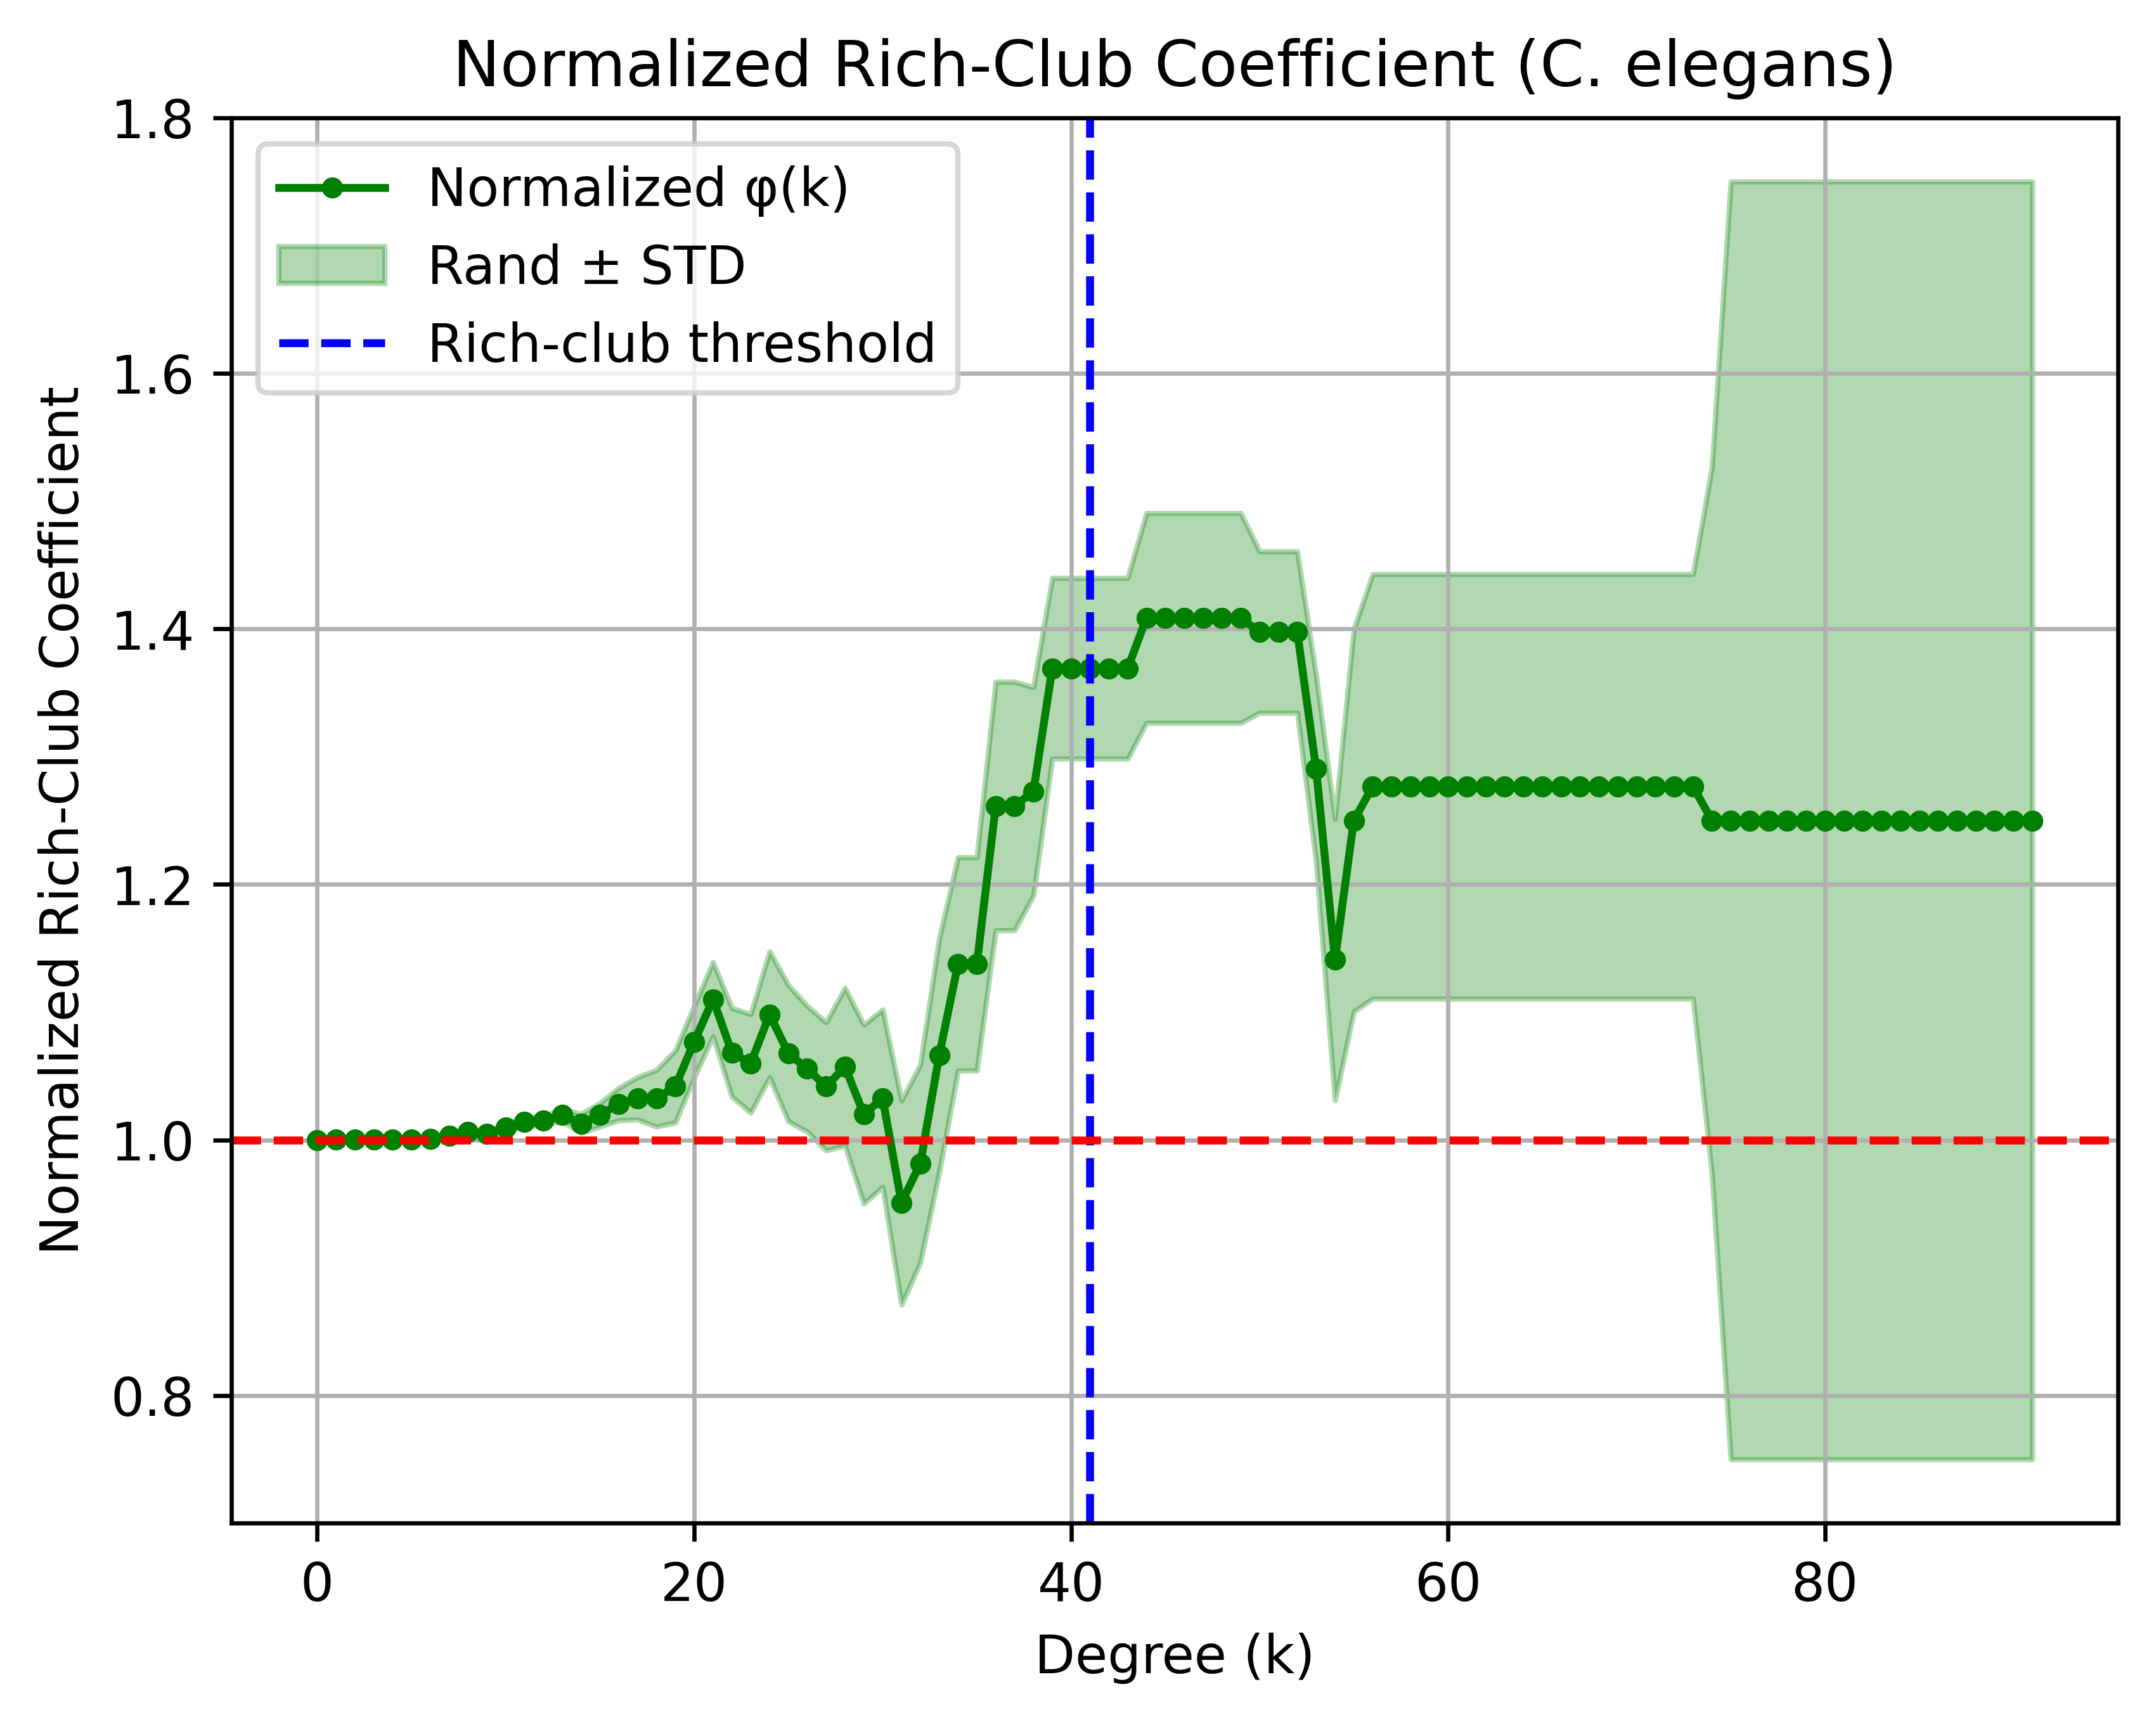

In [3]:
# ======== COMPUTE RICH-CLUB ========
rc_real, rc_rand_avg, rc_rand_std, rc_norm =  rich_club(G_dir, method="degree_preserving",n_rand=10)

# Convert to undirected and get degrees
G_und = G_dir.to_undirected()
degrees = dict(G_und.degree())


# ======== DETERMINE RICH-CLUB THRESHOLD ========
k_vals = list(rc_real.keys())
significant_k = [k for k in k_vals if rc_real[k] > rc_rand_avg[k] + rc_rand_std[k]]

if not significant_k:
    print("No significant rich-club degree found")
    k_rich = None
    rich_club_neurons = []
else:
    k_rich = 41 # This is the value from the paper............
    rich_club_neurons = [n for n, d in degrees.items() if d >= k_rich]
    print(f"Rich-club threshold degree: {k_rich}")
    print(f"Number of neurons in rich club: {len(rich_club_neurons)}")
    print("Rich-club neurons:", rich_club_neurons)

plot_rich_club(rc_real,rc_rand_avg,rc_rand_std,rc_norm,k_vals,k_rich)


## Let us see how computing the random reference netorks influence the rich club selection. 

In [ ]:
rc_real, rc_rand_avg, rc_rand_std, rc_norm = rich_club(G_dir, method="erdos_renyi",n_rand=10)
plot_rich_club(rc_real,rc_rand_avg,rc_rand_std,rc_norm,k_vals,k_rich)


## let's see how these random networks diverge from the real ones: 
### We are calculating graph metrics for the real, the configuration-preserved randomized, and the Erdos-Renyi ntwrkx

E is  2291
E is  2291


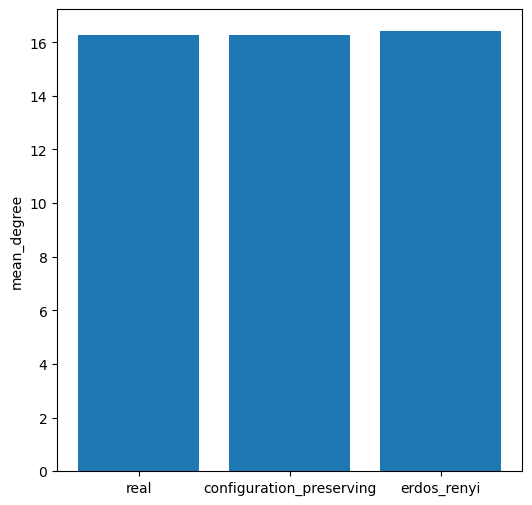

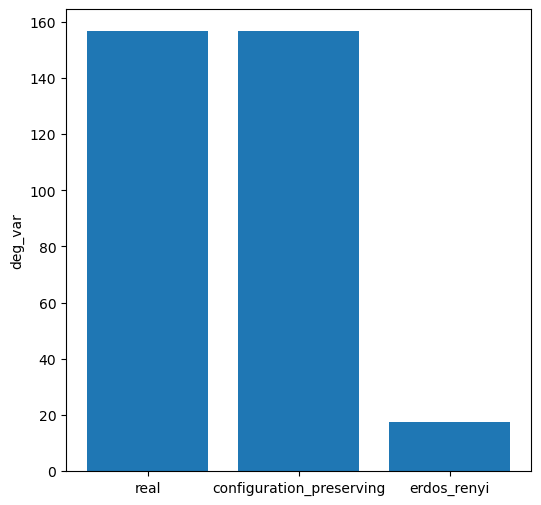

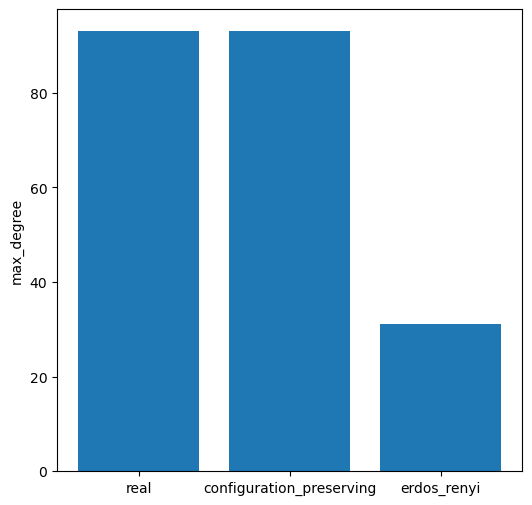

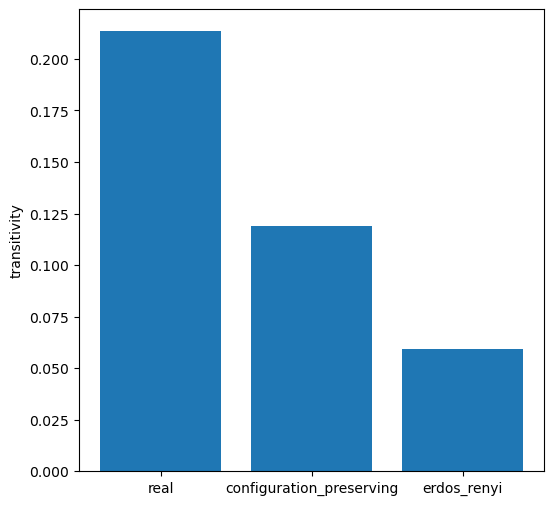

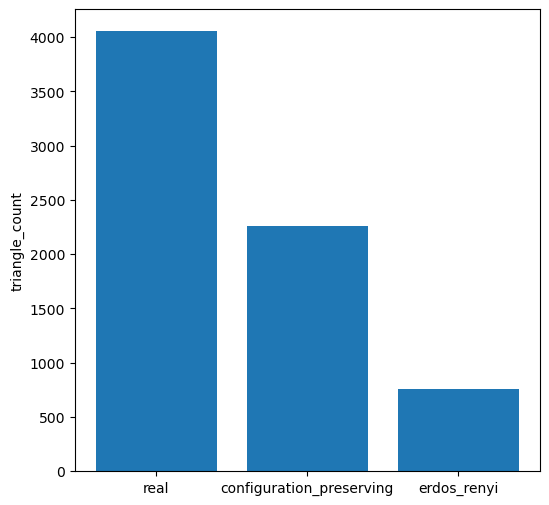

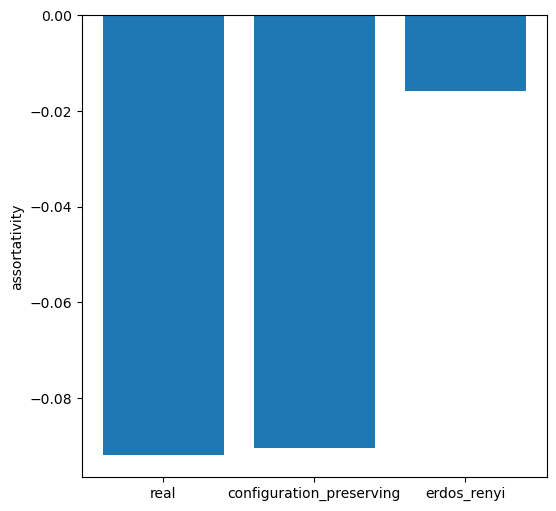

In [21]:
#Erdos-Renyi as the base of comparison ========================================

avg_degree_real = np.mean([d for n, d in G_und.degree()])
m_real = metric_set(G_und)


G_preserved = randomize_graph(G_und, method="degree_preserving")
avg_degree_preserved = np.mean([d for n, d in G_preserved.degree()])
m_preserved = metric_set(G_preserved)

G_er = randomize_graph(G_und, method="erdos_renyi")
avg_degree_er = np.mean([d for n, d in G_er.degree()])
m_er = metric_set(G_er)
labels = ['real','configuration_preserving', 'erdos_renyi']

for i in m_er.keys():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_ylabel(i)
    ax.bar(range(3),[m_real[i],m_preserved[i],m_er[i]])
    ax.set_xticks(range(3))
    ax.set_xticklabels(labels)
    plt.show()
